# Final Project Submission

Please fill out:
* Student name: Elizabeth Fawcett
* Student pace: part time
* Scheduled project review date/time: 10/07/19 1pm
* Instructor name: Matt Sparr
* Blog post URL: 


# Methodology

To evaluate the King's country dataset, I have chosen to use the following steps:
- Business Understanding
- Data Understanding and Data Prep
 - Obtain Data
 - Scrub Data
 - Explore Data
- Modeling
- Interpret
- Evaluation
- Deployment of Model

This is a combination of the OSEMN method explained at:[insert link here] and the CRISP-DM method explained at:[insert line here]. I found that the OSEMN method explained the data science process, but did not provide a framework for contextualization of the model or original data; whereas, the CRISP-DM method provided the business understanding and deployment steps to handle defining the scope of a project. I found the descriptors in the CRISP-DM method for projects did not specify obtaining or cleaning the data, which is where the OSEMN method shines. Both methods have strengths and weakness; as a result, I decided to pull the details from both to enrich my project building experience and to always keep the client in mind by expanding on the steps of both methodologies.

# Business Understanding

To develop an understanding of the nature of the business of the housing market, I'm referencing my own experience apartment shopping, the things I learned about what's important to me as a consumer of housing, an article written by one of the top real estate leaders in the northeast about common seller's questions, and the information provided in the dataset. 

In my own experience, when looking for an apartment, as a home buyer, I am looking for livability and the condition of the home. Will I need to invest to ensure that the place meets my personal standard? Do the features available meet my needs? For instance, in the past, a one bedroom apartment was sufficent. However, now I'm looking to use a bedroom as an office, so I am looking for two bedroom apartments, but one bathroom is still okay. To conclude, as a consumer I look at the quality of my investment and then determine if the space meets my needs.

From a real estate perspective, some of the most frequently asked questions by a home seller include the following. What does the market look like right now? At what point in the year should I sell? How can I improve my home to sell? What price should I set? What is the actual value of my home? insert [reference] here. It seems as if a seller is trying to pinpoint where they are on the sliding scale of value for their surrounding area, and maximizing profit based on this scale.

The data provides both categorical and continuous data points that fall into a few different categories. The continuous data deals with square footage, time, and location; whereas the categorical data includes aspects of the home that cannot change, one of which is whether or not the property is waterfront, and opinions about the home. This is a nice mixture of data that buyers and sellers would be interested in. There are some data points that include information about the surrounding neighborhood to develop the type of sliding scale of home value as well as the condition of the home and included features.

# Data Understanding and Data Prep
## Import Data
The dataset used for this exploration is located in this repository under the filename: kc_house_data.csv.

In [163]:
# Your code here - remember to use markdown cells for comments as well!
# import data set from repository
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')
!pip install folium
import folium
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv('kc_house_data.csv', index_col=0)
df.head()
# df.index

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Primary observations about the data in this king county housing data include:
- There are n/a's in the data set
- Even though most of the data is numerical, a lot of the numbers are categorical, like number of bedrooms
- There's something funky going on with the column names
- The years in yr_renovated have floats, but they need to be integers, and this is the case with the floors column as well

## Scrub Data

The following scrubbing techniques were applied to the original data:
- Manage n/a data types
- Delete duplicate rows
- Correct data types

### Manage n/a data types

In [164]:
# nans identification
print(len(df))
df.isna().sum()

21597


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront column is missing a lot values, what percentage of the dataset do these missing values constitute? The view column is missing far less, but what percentage of the data does it represent? This data set answers how many views does the property have prior to selling, this could be useful information for the seller in changing their price point as number of views increases.

In [165]:
# how much of the data is missing?
print('% of waterfront missing data: ' + str((df['waterfront'].isna().sum() / len(df['waterfront']))*100))
print('% of view missing data: ' + str((df['view'].isna().sum() / len(df['view']))*100))
print('% of yr_renovated data: ' + str((df['yr_renovated'].isna().sum() / len(df['yr_renovated']))*100))

% of waterfront missing data: 11.00152798999861
% of view missing data: 0.29170718155299347
% of yr_renovated data: 17.78950780200954


Since the waterfront and yr_renovated data represents a significant portion of the data, I will replace the n/a's with the mode, or the most common type of data for each data type. I've chosen to do this in lieu of using the mean because a mean cannot be calculated with nans in the dataset.

In [166]:
# managing nans
# fill waterfront and yr_renovated nans with the integrer 0, as it is the mode for both sets of data
print('waterfront mode: ' + str(df.waterfront.mode()))
print('yr_renovated mode: ' + str(df.yr_renovated.mode()))
df.loc[:,'waterfront'] = df.loc[:,'waterfront'].fillna(value=0)
# df.loc[:,'waterfront'].isna().sum() # uncomment to check efficacy
df.loc[:,'yr_renovated'] = df.loc[:,'yr_renovated'].fillna(value=0)
# df.loc[:,'yr_renovated'].isna().sum() # uncomment to check efficacy
# df.isna().sum() # uncomment to check entire df

# delete nans rows in view
df_clean = df.dropna()
# df_clean.isna().sum() #uncomment to check if nans were dropped
df_clean.head()

waterfront mode: 0    0.0
dtype: float64
yr_renovated mode: 0    0.0
dtype: float64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Delete Duplicate Rows

In [167]:
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

duplicated rows: 0


In [168]:
# code to drop duplicate row if necessary
# df_clean.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(df_clean.duplicated().sum()))
# print(len(df_clean))
# df_clean.head()

### Correct Data Types

First, let's see what the data types for this data set are.

In [169]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


There are two object data types in columns date and sqft_basement. What does the data in each column look like though?

In [170]:
print(df_clean.date.unique())
print(df_clean.sqft_basement.unique())

['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014' '10/7/2014'
 '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015' '5/14/2014'
 '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014' '6/26/2014'
 '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014' '6/13/2014'
 '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014' '7/7/2014'
 '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014' '4/28/2015'
 '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015' '3/3/2015'
 '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014' '8/28/2014'
 '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014' '8/25/2014'
 '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014' '3/16/2015'
 '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014' '12/22/2014'
 '1/28/2015' '6/2/2014' '11/14/2014' '6/18/2014' '5/19/2014' '9/4/2014'
 '5/22/2014' '2/26/2015' '7/25/2014' '12/23/2014' '9/8

So the slashes in the date information are causing python to read mixture of integers and strings as an object type, and the '?' variable in the sqft_basement data is again, a string within a bunch of integers. Let's fix those.
#### Date data from object to datetime

In [171]:
# date to datetime data type

#### Sqft_basement data from object to integer

There's a '?' in the data set. We'll have to change that to a number - the mode.

In [172]:
weird_basement = df_clean.loc[df_clean['sqft_basement'] == '?']
print(len(weird_basement))
print(df_clean.sqft_basement.mode())
# i selected the mode because calculating the mean is impossible with '?' string included.

452
0    0.0
dtype: object


Since the mode, is 0, I'll replace the ? with zeros in the sqft_basement data. 

In [173]:
df_clean.loc[df_clean['sqft_basement'] == '?', 'sqft_basement'] = 0
df_clean.sqft_basement.value_counts()

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.0       12798
0           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
450.0       103
530.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
650.0        75
780.0        75
240.0        74
680.0        73
380.0        73
770.0        71
          ...  
704.0         1
3000.0        1
2400.0        1
2310.0        1
1770.0        1
1816.0        1
4820.0        1
276.0         1
1880.0        1
176.0         1
266.0         1
2240.0        1
768.0         1
508.0         1
2490.0        1
1248.0        1
283.0         1
666.0         1
3260.0        1
506.0         1
415.0         1
518.0         1
2120.0        1
1135.0        1
143.0         1
935.0         1
2360.0        1
2500.0        1
875.0         1
3500.0        1
Name: sqft_basement, Len

Since the zeros haven't combined yet, I'll need to ensure that this column of data is set to an interger value.

In [174]:
df_clean.sqft_basement = df_clean.sqft_basement.astype(float)
df_clean.sqft_basement.value_counts()

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
910.0        71
850.0        71
          ...  
2600.0        1
1008.0        1
1281.0        1
274.0         1
417.0         1
2850.0        1
415.0         1
2240.0        1
243.0         1
143.0         1
1525.0        1
862.0         1
172.0         1
225.0         1
2490.0        1
935.0         1
3000.0        1
2500.0        1
1990.0        1
1840.0        1
1548.0        1
518.0         1
915.0         1
266.0         1
1930.0        1
588.0         1
1920.0        1
602.0         1
1245.0        1
1135.0        1
Name: sqft_basement, Len

Since the sqft_basement data type is pretty evenly divided between 0 and not zero, it might be useful to change this over to a binary type of data.

In [175]:
# change sqft_basement over into a categorical type
df_clean.loc[df_clean['sqft_basement'] != 0, 'sqft_basement'] = 1
basement = df_clean['sqft_basement'].astype(str)
# print(len(basement)) # unhash to verify that all rows have been transformed
# print(len(df_clean)) # unhash to verify that all rows have been transformed
df_clean.sqft_basement.value_counts() # unhash to verify the above code worked

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.0    13250
1.0     8284
Name: sqft_basement, dtype: int64

## Explore Data

For a quick preview of what we have to work with, we'll use the describe method.

In [176]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,0.384694,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,0.486534,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,1.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


After some intial glancing, it doesn't look like we actually that many continuous types of data. Let's proceed with the splitting of categorical and continuous data.

### Sort into categorical and continuous data

I am going to attempt to prove for data type using histograms and scatterplots, which will also give me a peek into normality.

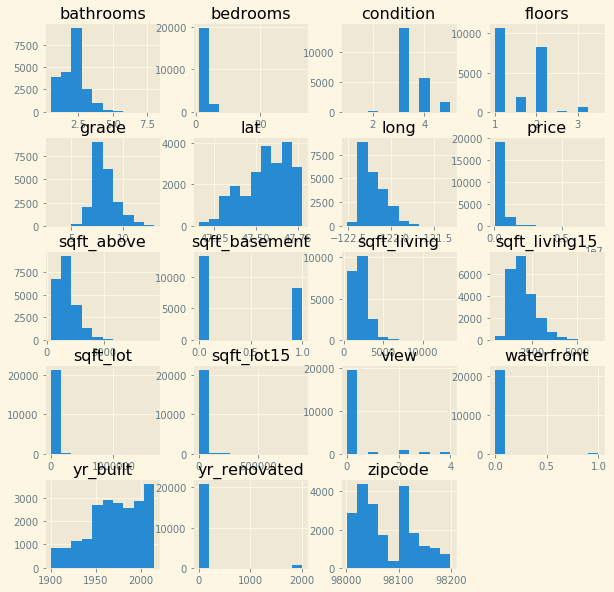

In [177]:
df_clean.hist(figsize=(10,10));

These initial histograms tell me that condition, floors, and view are for sure categorical. Now for the scatterplots.

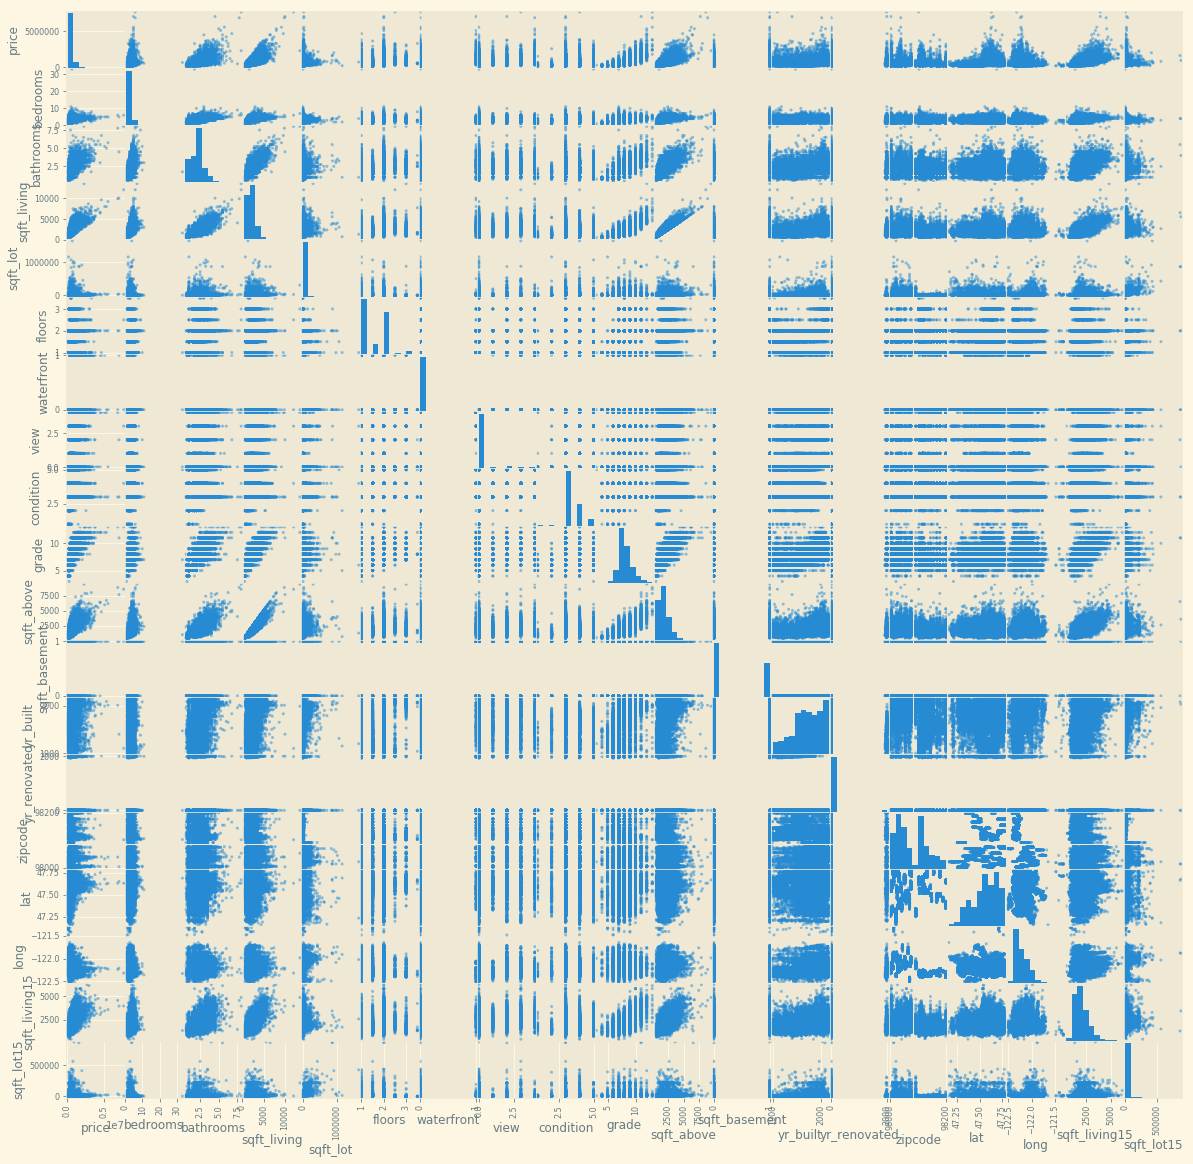

In [178]:
# scatter matrix to determine categorical data
pd.plotting.scatter_matrix(df_clean, figsize=(20,20));

Based on this information, floors, view, condition, grade, zipcode are definitately categorical variables. I would like to look at some of the other variables more closely, like the years and bedroom and bathrooms. It also looks like bedrooms has an outlier.

I should note that waterfront and yr_renovated are excluded from this matrix due to the data type being an object.

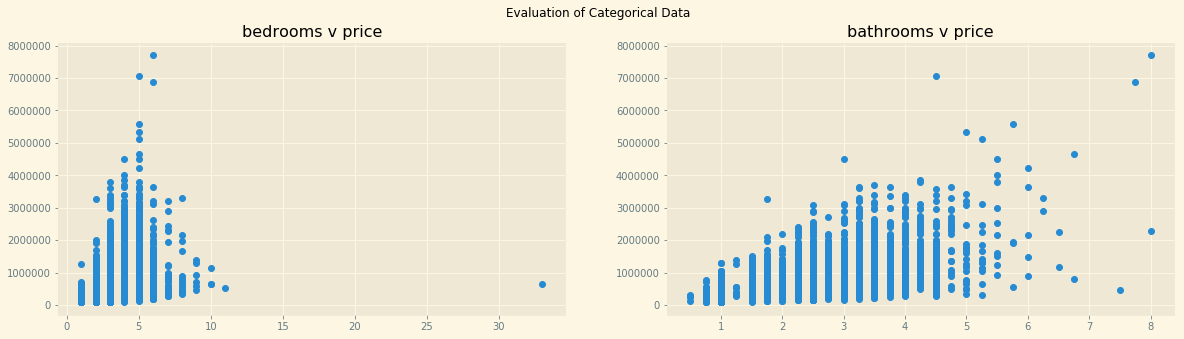

In [179]:
fig01 = plt.figure(figsize=(20,5))
fig01.suptitle('Evaluation of Categorical Data')
ax = fig01.add_subplot(121)
ax1 = ax.scatter(x=df_clean['bedrooms'], y=df_clean['price'])
ax1.axes.set_title('bedrooms v price')
ax = fig01.add_subplot(122)
ax2 = ax.scatter(x=df_clean['bathrooms'], y=df_clean['price'])
ax2.axes.set_title('bathrooms v price');

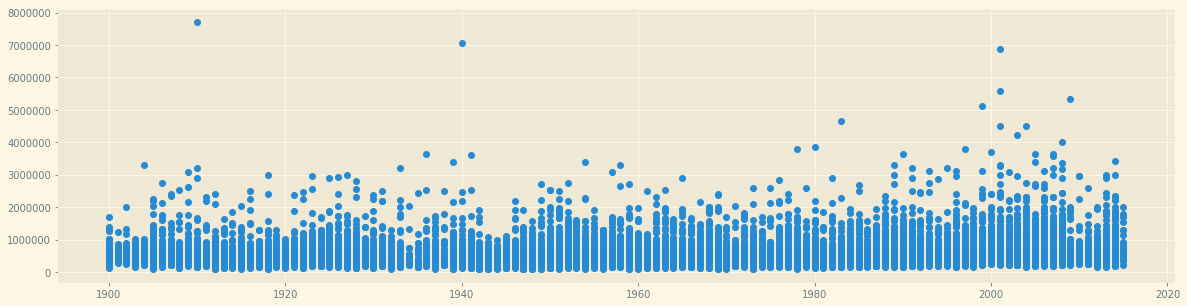

In [180]:
plt.figure(figsize=(20,5));
plt.scatter(x=df_clean['yr_built'], y=df_clean['price']);

This scatterplot shows that year is also a categorical value.

### Categorical and Continuous data seperation

In [181]:
categorical = df_clean.loc[:,['zipcode', 'yr_built','bedrooms',
                              'bathrooms', 'floors', 'waterfront', 'yr_renovated', 
                              'view', 'condition', 'grade']]
# categorical.head()
continuous = df_clean.loc[:, ['lat', 'long', 'sqft_lot', 'sqft_living', 'sqft_above', 
                              'sqft_basement', 'date', 'sqft_living15', 'sqft_lot15']]
# continuous.head()
target = pd.DataFrame(df_clean.loc[:, 'price'])
# target.index
# raw = [continuous, categorical, target]
# raw.index

In [182]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
zipcode         21534 non-null int64
yr_built        21534 non-null int64
bedrooms        21534 non-null int64
bathrooms       21534 non-null float64
floors          21534 non-null float64
waterfront      21534 non-null float64
yr_renovated    21534 non-null float64
view            21534 non-null float64
condition       21534 non-null int64
grade           21534 non-null int64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


But what does the data look like in each of these cells?

In [183]:
print(categorical.zipcode.unique())
print(categorical.yr_built.unique())
print(categorical.bedrooms.unique())
print(categorical.bathrooms.unique())
print(categorical.waterfront.unique())
print(categorical.yr_renovated.unique())
print(categorical.view.unique())
print(categorical.condition.unique())
print(categorical.grade.unique())

[98178 98125 98028 98136 98074 98053 98003 98146 98038 98007 98115 98107
 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052 98027
 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008 98059
 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032 98045
 98102 98077 98198 98108 98168 98177 98029 98006 98109 98022 98033 98155
 98024 98011 98031 98106 98072 98188 98065 98014 98055 98039]
[1955 1951 1933 1965 1987 2001 1995 1960 2003 1942 1927 1977 1900 1979
 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929 1981
 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991 1954
 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988 1962
 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924 1990
 1914 1926 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943 1957 2004
 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1963 1998 1913 2013
 1907 1958 2012 1912 2011 1932 1944 1902 2009 1903 1970 2015 1934 1938
 1919

In [184]:
# generating categories for each type of categorical data
categorical['zipcode'] = categorical['zipcode'].astype('category')
# categorical['yr_built'] = categorical['yr_built'].astype('category')
# This data is still meaningful as an integer value because 1954 is later than 1953, so it will stay as an integer value
# categorical['bedrooms'] = categorical['bedrooms'].astype('category')
# this data will be changed into an ordered category later in the code
categorical['bathrooms'] = categorical['bathrooms'].astype('category')
categorical['waterfront'] = categorical['waterfront'].astype('category')
# categorical['yr_renovated'] = categorical['yr_renovated'].astype('category') 
# This data needs to be transformed prior to being set as a cateogory, 
# so this code will happen later after transformation.
categorical['view'] = categorical['view'].astype('category')
categorical['condition'] = categorical['condition'].astype('category')
categorical['grade'] = categorical['grade'].astype('category')
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
zipcode         21534 non-null category
yr_built        21534 non-null int64
bedrooms        21534 non-null int64
bathrooms       21534 non-null category
floors          21534 non-null float64
waterfront      21534 non-null category
yr_renovated    21534 non-null float64
view            21534 non-null category
condition       21534 non-null category
grade           21534 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 972.8 KB


Now that all data is processed and cleaned, let's put it all together and begin to visualize.

#### Join categorical, continuous, and target data together in one dataframe.

In [185]:
all_data = [continuous, categorical, target]
kc_housing = pd.concat(all_data, axis=1)
kc_housing.head()

,lat,long,sqft_lot,sqft_living,sqft_above,sqft_basement,date,sqft_living15,sqft_lot15,zipcode,yr_built,bedrooms,bathrooms,floors,waterfront,yr_renovated,view,condition,grade,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,47.5112,-122.257,5650,1180,1180,0.0,10/13/2014,1340,5650,98178,1955,3,1.00,1.0,0.0,0.0,0.0,3,7,221900.0
6414100192,47.7210,-122.319,7242,2570,2170,1.0,12/9/2014,1690,7639,98125,1951,3,2.25,2.0,0.0,1991.0,0.0,3,7,538000.0
5631500400,47.7379,-122.233,10000,770,770,0.0,2/25/2015,2720,8062,98028,1933,2,1.00,1.0,0.0,0.0,0.0,3,6,180000.0
2487200875,47.5208,-122.393,5000,1960,1050,1.0,12/9/2014,1360,5000,98136,1965,4,3.00,1.0,0.0,0.0,0.0,5,7,604000.0
1954400510,47.6168,-122.045,8080,1680,1680,0.0,2/18/2015,1800,7503,98074,1987,3,2.00,1.0,0.0,0.0,0.0,3,8,510000.0


In [186]:
kc_housing.describe()

,lat,long,sqft_lot,sqft_living,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,bedrooms,floors,yr_renovated,price
count,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04
mean,47.560180,-122.213948,1.509060e+04,2079.827854,1788.557537,0.384694,1986.299944,12751.079502,1971.002275,3.373038,1.494126,68.866722,5.400577e+05
std,0.138528,0.140735,4.138021e+04,917.446520,827.745641,0.486534,685.121001,27255.483308,29.376044,0.926410,0.539806,364.314552,3.660596e+05
min,47.155900,-122.519000,5.200000e+02,370.000000,370.000000,0.000000,399.000000,651.000000,1900.000000,1.000000,1.000000,0.000000,7.800000e+04
25%,47.471200,-122.328000,5.040000e+03,1430.000000,1190.000000,0.000000,1490.000000,5100.000000,1951.000000,3.000000,1.000000,0.000000,3.220000e+05
50%,47.571900,-122.230000,7.617000e+03,1910.000000,1560.000000,0.000000,1840.000000,7620.000000,1975.000000,3.000000,1.500000,0.000000,4.500000e+05
75%,47.678100,-122.125000,1.068775e+04,2550.000000,2210.000000,1.000000,2360.000000,10083.000000,1997.000000,4.000000,2.000000,0.000000,6.450000e+05
max,47.777600,-121.315000,1.651359e+06,13540.000000,9410.000000,1.000000,6210.000000,871200.000000,2015.000000,33.000000,3.500000,2015.000000,7.700000e+06


# Modeling - 1.0
Below is the model after scrubbing and exploring have been managed, let's see what the model picks up.

In [187]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_housing.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:25:42   Log-Likelihood:            -2.8635e+05
No. Observations:               21534   AIC:                         5.737e+05
Df Residuals:                   21035   BIC:                         5.777e+05
Df Model:                         498                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.384e+07   5.65e+06     -5.990      0.000   -4.49e+07   -2.28e+07
date[T.1/12/2015]   2.943e+04   1.48e+05      0.199      0.842    -2.6e+05    3.19e+05
date[T.1/13/2015]   4.618e+04   1.48e+05      0.313      0.755   -2.43e+05    3.36e+05
date[T.1/14/2015]   1.588e+04   1.47e+05      0.108      0.914   -2.73e+05    3.05e+05
date[T.1/15/2015]   2.242e+04   1.48e+05      0.152      0.879   -2.67e+05    3.12e+05
date[T.1/16/2015]  -1.467e+04   1.47e+05     -0.100      0.921   -3.04e+05    2.74e+05
date[T.1/17/2015]   1.006e+05   2.07e+05      0.487      0.626   -3.04e+05    5.05e+05
date[T.1/19/2015]  -1.656e+04   1.55e+05     -0.107      0.915    -3.2e+05    2.87e+05
date[T.1/2/2015]    5.232e+04   1.48e+05      0.354      0.723   -2.37e+05    3.42e+05
date[T.1/20/2015]   5.364e+04   1.48e+05      0.363      0.716   -2.36e+05    3.43e+05
date[T.1/21/2015]   4.589e+04   1.47e+05      0.311      0.755   -2.43e+05    3.35e+05
date[T.1/22/2015]   2.522e+04   1.48e+05      0.171      0.864   -2.64e+05    3.15e+05
date[T.1/23/2015]   2278.8837   1.48e+05      0.015      0.988   -2.87e+05    2.92e+05
date[T.1/24/2015]  -1.094e+05   1.63e+05     -0.670      0.503    -4.3e+05    2.11e+05
date[T.1/25/2015]   5.897e+04   1.69e+05      0.350      0.727   -2.72e+05    3.89e+05
date[T.1/26/2015]  -7720.9580   1.48e+05     -0.052      0.958   -2.97e+05    2.81e+05
date[T.1/27/2015]   5.236e+04   1.47e+05      0.355      0.722   -2.36e+05    3.41e+05
date[T.1/28/2015]   2.011e+04   1.47e+05      0.137      0.891   -2.68e+05    3.09e+05
date[T.1/29/2015]   4.215e+04   1.48e+05      0.285      0.775   -2.47e+05    3.32e+05
date[T.1/30/2015]   3.966e+04   1.48e+05      0.268      0.789   -2.51e+05     3.3e+05
date[T.1/31/2015]   1.554e+04   2.07e+05      0.075      0.940    -3.9e+05    4.21e+05
date[T.1/5/2015]    3.689e+04   1.47e+05      0.250      0.802   -2.52e+05    3.26e+05
date[T.1/6/2015]    3.662e+04   1.48e+05      0.248      0.804   -2.53e+05    3.26e+05
date[T.1/7/2015]    6.257e+04   1.47e+05      0.425      0.671   -2.26e+05    3.51e+05
date[T.1/8/2015]    9504.2937   1.48e+05      0.064      0.949    -2.8e+05    2.99e+05
date[T.1/9/2015]    8.198e+04   1.48e+05      0.554      0.580   -2.08e+05    3.72e+05
date[T.10/1/2014]   4.053e+04   1.47e+05      0.276      0.783   -2.47e+05    3.28e+05
date[T.10/10/2014]  1.334e+04   1.47e+05      0.091      0.928   -2.75e+05    3.01e+05
date[T.10/11/2014]  3.825e+05   1.83e+05      2.096      0.036    2.48e+04     7.4e+05
date[T.10/12/2014]  5.718e+04   1.69e+05      0.339      0.735   -2.74e+05    3.88e+05
date[T.10/13/2014]   4.13e+04   1.47e+05      0.281      0.779   -2.47e+05     3.3e+05
date[T.10/14/2014]  4.013e+04   1.47e+05      0.273      0.785   -2.48e+05    3.28e+05
date[T.10/15/2014]  1.535e+04   1.47e+

The adjusted r-squared vales is 0.843, which is pretty good for a raw data set. Our goal is to reach 0.800. The following variables are statistically significant (meaning their p-value is less than 0.05):
- zipcode = 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98029, 98033, 98034, 98038, 98039, 98040, 98045, 98052, 98053, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98177, 98198, 98199
- yr_built = 1901, 1908, 1952, 1953, 1954, 1955, 1960, 1961, 1962, 1964, 1965, 1966, 1974, 1977, 1978, 1979, 1986, 1987, 1988, 1990, 1991, 1992, 1997, 1998, 2000, 2001, 2002, 2004, 2005, 2006, 2007
- bathrooms = 4.25, 4.75, 5.0, 5.25, 5.5, 5.75, 6, 6.25, 6.75, 7.75, 8
- waterfront = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 12, 13
- lat
- long
- sqft_lot
- sqft_living
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15
- bedrooms
- floors
- yr_renovated

The only column of data without statistically significant data is the **date** column, so let's **drop** it.

It looks like we need a management plan for zipcode and yr_built. I'd like to **see where these signifcant zipcodes** are located. In yr_built, there are several spans of time where some years contibuted to price. It might be useful to **categorize these yr_built** separately from every other, because advice to these consumers will be different. It also looks as if larger homes need to be separated out as well, because homes with 4.25 bathrooms or more contribute to price, and could be masking interactions for smaller homes, which is where I want to focus my information and recommendations to the client.

However, before we move forward with this three step cleaning plan, let's remove outliers.

## Find Outliers

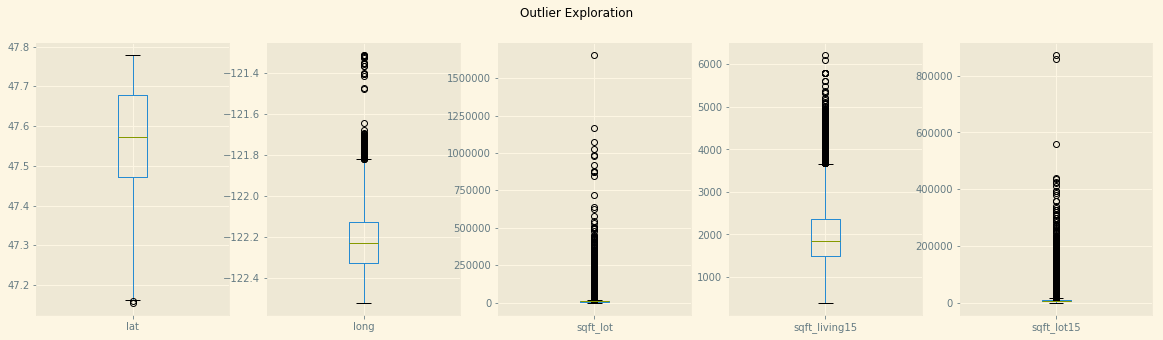

In [188]:
fig02 = plt.figure(figsize=(20,5))
fig02.suptitle('Outlier Exploration')


ax = fig02.add_subplot(151)
ax1 = kc_housing.lat.plot(kind='box')
ax = fig02.add_subplot(152)
ax2 = kc_housing.long.plot(kind='box')
ax = fig02.add_subplot(153)
ax3 = kc_housing.sqft_lot.plot(kind='box')
ax = fig02.add_subplot(154)
ax6 = kc_housing.sqft_living15.plot(kind='box')
ax = fig02.add_subplot(155)
ax7= kc_housing.sqft_lot15.plot(kind='box')

Since both of the lot sizes have so many outliers, let's eliminate all sqft_lot > 17500. Then we'll rerun this outlier exploration.

length of cleaner dataset: 18872


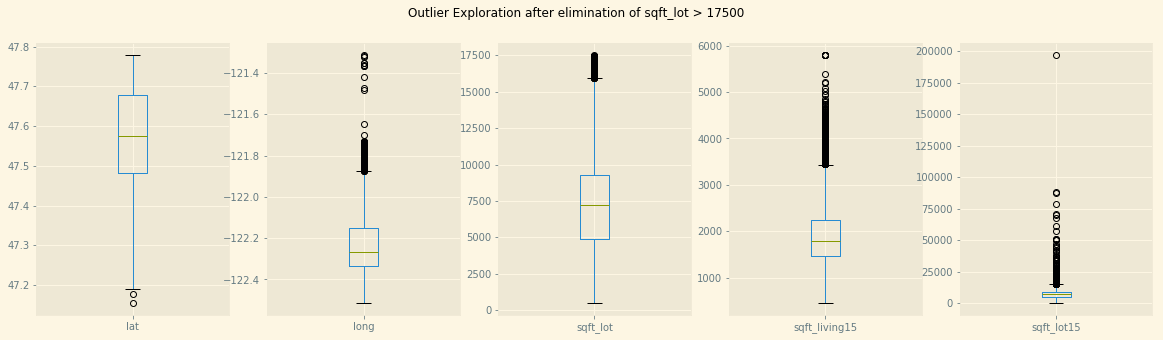

In [189]:
# eliminate all sqft_lot > 17500
kc_housing_mod_1 = kc_housing.loc[kc_housing['sqft_lot'] < 17500]
print('length of cleaner dataset: ' + str(len(kc_housing_mod_1)))
fig03 = plt.figure(figsize=(20,5))
fig03.suptitle('Outlier Exploration after elimination of sqft_lot > 17500')


ax = fig03.add_subplot(151)
ax1 = kc_housing_mod_1.lat.plot(kind='box')
ax = fig03.add_subplot(152)
ax2 = kc_housing_mod_1.long.plot(kind='box')
ax = fig03.add_subplot(153)
ax3 = kc_housing_mod_1.sqft_lot.plot(kind='box')
ax = fig03.add_subplot(154)
ax6 = kc_housing_mod_1.sqft_living15.plot(kind='box')
ax = fig03.add_subplot(155)
ax7 = kc_housing_mod_1.sqft_lot15.plot(kind='box')

Let's do the same thing for sqft_lot15, and eliminate all nearest neighbors with more than 15000 square foot.

length of cleaner dataset: 18371


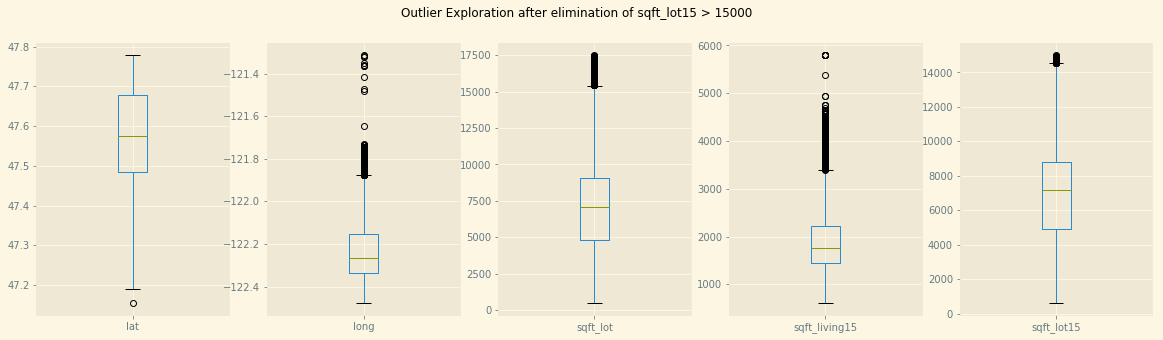

In [190]:
# eliminate all sqft_lot15 > 15000
kc_housing_mod_1 = kc_housing_mod_1.loc[kc_housing_mod_1['sqft_lot'] < 17500]
kc_housing_mod_1 = kc_housing_mod_1.loc[kc_housing_mod_1['sqft_lot15'] < 15000]
print('length of cleaner dataset: ' + str(len(kc_housing_mod_1)))
fig04 = plt.figure(figsize=(20,5))
fig04.suptitle('Outlier Exploration after elimination of sqft_lot15 > 15000')


ax = fig04.add_subplot(151)
ax1 = kc_housing_mod_1.lat.plot(kind='box')
ax = fig04.add_subplot(152)
ax2 = kc_housing_mod_1.long.plot(kind='box')
ax = fig04.add_subplot(153)
ax3 = kc_housing_mod_1.sqft_lot.plot(kind='box')
ax = fig04.add_subplot(154)
ax6 = kc_housing_mod_1.sqft_living15.plot(kind='box')
ax = fig04.add_subplot(155)
ax7 = kc_housing_mod_1.sqft_lot15.plot(kind='box')

Let's do the same for sqft_living15, eliminate all values > 4000.

length of cleaner dataset: 18266


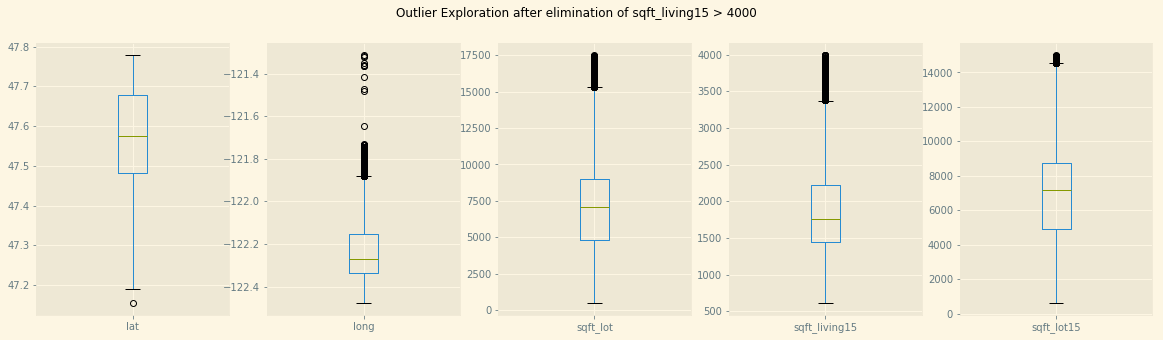

In [191]:
# eliminate all sqft_living15 > 4000
kc_housing_mod_1 = kc_housing_mod_1.loc[kc_housing_mod_1['sqft_lot'] < 17500]
kc_housing_mod_1 = kc_housing_mod_1.loc[kc_housing_mod_1['sqft_lot15'] < 15000]
kc_housing_mod_1 = kc_housing_mod_1.loc[kc_housing_mod_1['sqft_living15'] < 4000]
print('length of cleaner dataset: ' + str(len(kc_housing_mod_1)))
fig06 = plt.figure(figsize=(20,5))
fig06.suptitle('Outlier Exploration after elimination of sqft_living15 > 4000')


ax = fig06.add_subplot(151)
ax1 = kc_housing_mod_1.lat.plot(kind='box')
ax = fig06.add_subplot(152)
ax2 = kc_housing_mod_1.long.plot(kind='box')
ax = fig06.add_subplot(153)
ax3 = kc_housing_mod_1.sqft_lot.plot(kind='box')
ax = fig06.add_subplot(154)
ax6 = kc_housing_mod_1.sqft_living15.plot(kind='box')
ax = fig06.add_subplot(155)
ax7 = kc_housing_mod_1.sqft_lot15.plot(kind='box')

## Remove Date

In [192]:
# remove date
kc_housing = kc_housing.drop('date', axis=1)

## Zipcode Exploration and Visualization
Where are the significant zipcodes located?

In [193]:
# add these to the significant map 98011, 98019, 98058, 98133
sig_zip = [98004, 98005, 98006, 98007, 98008, 98010, 98014, 
           98022, 98023, 98024, 98027, 98029, 98033, 98034, 
           98038, 98039, 98040, 98045, 98052, 98053, 98056, 
           98059, 98065, 98070, 98072, 98074, 98075, 98077, 
           98102, 98103, 98105, 98106, 98107, 98108, 98109, 
           98112, 98115, 98116, 98117, 98118, 98119, 98122, 
           98125, 98126, 98136, 98144, 98177, 98198, 98199]
sig_zip_ll = [(47.61775,-122.21080), (47.62007,-122.17309), (47.55276,-122.15059), (47.61974,-122.14299),
              (47.60563,-122.10829), (47.31424,-121.99496), (47.65272,-121.89779), (47.08806,-121.71148),
              (47.30390,-122.37574), (47.61539,-121.78244), (47.49638,-121.99090), (47.55960,-122.02395), 
              (47.67316,-122.19763), (47.71519,-122.21064), (47.40377,-122.00586), (47.62764,-122.24317), 
              (47.56523,-122.23315), (47.46103,-121.54475), (47.68050,-122.12094), (47.50887,-122.19496), 
              (47.50413,-122.10966), (47.56934,-121.77702), (47.42073,-122.45094), (47.76904,-122.13025), 
              (47.62879,-122.04237), (47.58829,-122.03486), (47.75237,-122.05856), (47.63575,-122.32436),
              (47.67029,-122.34831), (47.66040,-122.28053), (47.54773,-122.35267), (47.66482,-122.38378), 
              (47.54108,-122.31331), (47.63444,-122.34190), (47.63197,-122.28741), (47.68361,-122.27802), 
              (47.57629,-122.40064), (47.68858,-122.38417), (47.54196,-122.26765), (47.63898,-122.36921),
              (47.61353,-122.29734), (47.71579,-122.29346), (47.55178,-122.37222), (47.53603,-122.39315), 
              (47.58394,-122.29149), (47.73917,-122.37532), (47.38230,-122.31074), (47.65142,-122.40621)]
nsig_zip = []
# map generation
sig_zip_map = folium.Map(location=(47.61775,-122.21080))

# addition of significant zipcode data
popup_98004 = "98004"
marker_98004 = folium.Marker([47.61775,-122.21080], popup=popup_98004, icon=folium.Icon(color='green'))
popup_98005 = "98005"
marker_98005 = folium.Marker([47.62007,-122.17309], popup=popup_98005, icon=folium.Icon(color='green'))
popup_98006 = "98006"
marker_98006 = folium.Marker([47.55276,-122.15059], popup=popup_98006, icon=folium.Icon(color='green'))
popup_98007 = "98007"
marker_98007 = folium.Marker([47.61974,-122.14299], popup=popup_98007, icon=folium.Icon(color='green'))
popup_98008 = "98008"
marker_98008 = folium.Marker([47.60563,-122.10829], popup=popup_98008, icon=folium.Icon(color='green'))
popup_98010 = "98010"
marker_98010 = folium.Marker([47.31424,-121.99496], popup=popup_98010, icon=folium.Icon(color='green'))
popup_98014 = "98014"
marker_98014 = folium.Marker([47.65272,-121.89779], popup=popup_98014, icon=folium.Icon(color='green'))
popup_98022 = "98022"
marker_98022 = folium.Marker([47.08806,-121.71148], popup=popup_98022, icon=folium.Icon(color='green'))
popup_98023 = "98023"
marker_98023 = folium.Marker([47.30390,-122.37574], popup=popup_98023, icon=folium.Icon(color='green'))
popup_98024 = "98024"
marker_98024 = folium.Marker([47.61539,-121.78244], popup=popup_98024, icon=folium.Icon(color='green'))
popup_98027 = "98027"
marker_98027 = folium.Marker([47.49638,-121.99090], popup=popup_98027, icon=folium.Icon(color='green'))
popup_98029 = "98029"
marker_98029 = folium.Marker([47.55960,-122.02395], popup=popup_98029, icon=folium.Icon(color='green'))
popup_98033 = "98033"
marker_98033 = folium.Marker([47.67316,-122.19763], popup=popup_98033, icon=folium.Icon(color='green'))
popup_98034 = "98034"
marker_98034 = folium.Marker([47.71519,-122.21064], popup=popup_98034, icon=folium.Icon(color='green'))
popup_98038 = "98038"
marker_98038 = folium.Marker([47.40377,-122.00586], popup=popup_98038, icon=folium.Icon(color='green'))
popup_98039 = "98039"
marker_98039 = folium.Marker([47.62764,-122.24317], popup=popup_98039, icon=folium.Icon(color='green'))
popup_98040 = "98040"
marker_98040 = folium.Marker([47.56523,-122.23315], popup=popup_98040, icon=folium.Icon(color='green'))
popup_98045 = "98045"
marker_98045 = folium.Marker([47.46103,-121.54475], popup=popup_98045, icon=folium.Icon(color='green'))
popup_98052 = "98052"
marker_98052 = folium.Marker([47.68050,-122.12094], popup=popup_98052, icon=folium.Icon(color='green'))
popup_98053 = "98053"
marker_98053 = folium.Marker([47.50887,-122.19496], popup=popup_98053, icon=folium.Icon(color='green'))
popup_98056 = "98056"
marker_98056 = folium.Marker([47.50413,-122.10966], popup=popup_98056, icon=folium.Icon(color='green'))
popup_98059 = "98059"
marker_98059 = folium.Marker([47.56934,-121.77702], popup=popup_98059, icon=folium.Icon(color='green'))
popup_98065 = "98065"
marker_98065 = folium.Marker([47.42073,-122.45094], popup=popup_98065, icon=folium.Icon(color='green'))
popup_98070 = "98070"
marker_98070 = folium.Marker([47.76904,-122.13025], popup=popup_98070, icon=folium.Icon(color='green'))
popup_98072 = "98072"
marker_98072 = folium.Marker([47.62879,-122.04237], popup=popup_98072, icon=folium.Icon(color='green'))
popup_98074 = "98074"
marker_98074 = folium.Marker([47.58829,-122.03486], popup=popup_98074, icon=folium.Icon(color='green'))
popup_98075 = "98075"
marker_98075 = folium.Marker([47.58829,-122.03486], popup=popup_98075, icon=folium.Icon(color='green'))
popup_98077 = "98077"
marker_98077 = folium.Marker([47.75237,-122.05856], popup=popup_98077, icon=folium.Icon(color='green'))
popup_98102 = "98102"
marker_98102 = folium.Marker([47.63575,-122.32436], popup=popup_98102, icon=folium.Icon(color='green'))
popup_98103 = "98103"
marker_98103 = folium.Marker([47.67029,-122.34831], popup=popup_98103, icon=folium.Icon(color='green'))
popup_98105 = "98105"
marker_98105 = folium.Marker([47.66040,-122.28053], popup=popup_98105, icon=folium.Icon(color='green'))
popup_98106 = "98106"
marker_98106 = folium.Marker([47.54773,-122.35267], popup=popup_98106, icon=folium.Icon(color='green'))
popup_98107 = "98107"
marker_98107 = folium.Marker([47.66482,-122.38378], popup=popup_98107, icon=folium.Icon(color='green'))
popup_98108 = "98108"
marker_98108 = folium.Marker([47.54108,-122.31331], popup=popup_98108, icon=folium.Icon(color='green'))
popup_98109 = "98109"
marker_98109 = folium.Marker([47.63444,-122.34190], popup=popup_98109, icon=folium.Icon(color='green'))
popup_98112 = "98112"
marker_98112 = folium.Marker([47.63197,-122.28741], popup=popup_98112, icon=folium.Icon(color='green'))
popup_98115 = "98115"
marker_98115 = folium.Marker([47.68361,-122.27802], popup=popup_98115, icon=folium.Icon(color='green'))
popup_98116 = "98116"
marker_98116 = folium.Marker([47.57629,-122.40064], popup=popup_98116, icon=folium.Icon(color='green'))
popup_98117 = "98117"
marker_98117 = folium.Marker([47.68858,-122.38417], popup=popup_98117, icon=folium.Icon(color='green'))
popup_98118 = "98118"
marker_98118 = folium.Marker([47.54196,-122.26765], popup=popup_98118, icon=folium.Icon(color='green'))
popup_98119 = "98119"
marker_98119 = folium.Marker([47.63898,-122.36921], popup=popup_98119, icon=folium.Icon(color='green'))
popup_98122 = "98122"
marker_98122 = folium.Marker([47.61353,-122.29734], popup=popup_98122, icon=folium.Icon(color='green'))
popup_98125 = "98125"
marker_98125 = folium.Marker([47.71579,-122.29346], popup=popup_98125, icon=folium.Icon(color='green'))
popup_98126 = "98126"
marker_98126 = folium.Marker([47.55178,-122.37222], popup=popup_98126, icon=folium.Icon(color='green'))
popup_98136 = "98136"
marker_98136 = folium.Marker([47.53603,-122.39315], popup=popup_98136, icon=folium.Icon(color='green'))
popup_98144 = "98144"
marker_98144 = folium.Marker([47.58394,-122.29149], popup=popup_98144, icon=folium.Icon(color='green'))
popup_98177 = "98177"
marker_98177 = folium.Marker([47.73917,-122.37532], popup=popup_98177, icon=folium.Icon(color='green'))
popup_98198 = "98198"
marker_98198 = folium.Marker([47.38230,-122.31074], popup=popup_98198, icon=folium.Icon(color='green'))
popup_98199 = "98199"
marker_98199 = folium.Marker([47.65142,-122.40621], popup=popup_98199, icon=folium.Icon(color='green'))

# populate zipcode data onto map
sig_zip_map.add_child(marker_98004)
sig_zip_map.add_child(marker_98005)
sig_zip_map.add_child(marker_98006)
sig_zip_map.add_child(marker_98007)
sig_zip_map.add_child(marker_98008)
sig_zip_map.add_child(marker_98010)
sig_zip_map.add_child(marker_98014)
sig_zip_map.add_child(marker_98022)
sig_zip_map.add_child(marker_98023)
sig_zip_map.add_child(marker_98024)
sig_zip_map.add_child(marker_98027)
sig_zip_map.add_child(marker_98029)
sig_zip_map.add_child(marker_98033)
sig_zip_map.add_child(marker_98034)
sig_zip_map.add_child(marker_98038)
sig_zip_map.add_child(marker_98039)
sig_zip_map.add_child(marker_98040)
sig_zip_map.add_child(marker_98045)
sig_zip_map.add_child(marker_98052)
sig_zip_map.add_child(marker_98053)
sig_zip_map.add_child(marker_98056)
sig_zip_map.add_child(marker_98059)
sig_zip_map.add_child(marker_98065)
sig_zip_map.add_child(marker_98070)
sig_zip_map.add_child(marker_98072)
sig_zip_map.add_child(marker_98074)
sig_zip_map.add_child(marker_98075)
sig_zip_map.add_child(marker_98077)
sig_zip_map.add_child(marker_98102)
sig_zip_map.add_child(marker_98103)
sig_zip_map.add_child(marker_98105)
sig_zip_map.add_child(marker_98106)
sig_zip_map.add_child(marker_98107)
sig_zip_map.add_child(marker_98108)
sig_zip_map.add_child(marker_98109)
sig_zip_map.add_child(marker_98112)
sig_zip_map.add_child(marker_98115)
sig_zip_map.add_child(marker_98116)
sig_zip_map.add_child(marker_98117)
sig_zip_map.add_child(marker_98118)
sig_zip_map.add_child(marker_98119)
sig_zip_map.add_child(marker_98122)
sig_zip_map.add_child(marker_98125)
sig_zip_map.add_child(marker_98126)
sig_zip_map.add_child(marker_98136)
sig_zip_map.add_child(marker_98144)
sig_zip_map.add_child(marker_98177)
sig_zip_map.add_child(marker_98198)
sig_zip_map.add_child(marker_98199)

print('total number of zipcodes: ' + str(len(kc_housing['zipcode'].unique())))
print('number of significant zipcodes: ' + str(len(sig_zip)))

# display map
sig_zip_map

total number of zipcodes: 70
number of significant zipcodes: 49


In [194]:
# add insignificant zipcodes to map using a red marker. There are 21.
total_zip = np.array(sorted(kc_housing['zipcode'].unique()))
sig_zip = np.array(sorted(sig_zip))
def Diff(li1, li2): 
    return (list(set(li1) - set(li2)))
in_sig_zip = Diff(total_zip,sig_zip)
in_sig_zip = sorted(in_sig_zip)
# in_sig_zip = [98001, 98002, 98003, 98011, 98019, 98028, 98030, 
            #   98031, 98032, 98042, 98055, 98058, 98092, 98133,
            #   98146, 98148, 98155, 98166, 98168, 98178, 98188]
# in_sig_zipll = [(47.30749,-122.26591), (47.31005,-122.20918), (47.30776,-122.31121), (47.75028,-122.20465),
                # (47.73320,-121.79933), (47.75488,-122.24710), (47.36236,-122.19828), (47.41390,-122.19809), 
                # (47.39233,-122.26459), (47.36451,-122.10208), (47.45108,-122.19632), (47.43509,-122.11652), 
                # (47.28985,-122.10962), (47.73957,-122.34495), (47.50035,-122.36334), (47.44655,-122.32183), 
                # (47.75530,-122.29591), (47.44796,-122.35840), (47.49011,-122.29153), (47.49637,-122.25194),
                # (47.44821,-122.27785)]

popup_98001 = "98001"
marker_98001 = folium.Marker([47.30749,-122.26591], popup=popup_98001, icon=folium.Icon(color='red'))
popup_98002 = "98002"
marker_98002 = folium.Marker([47.31005,-122.20918], popup=popup_98002, icon=folium.Icon(color='red'))
popup_98003 = "98003"
marker_98003 = folium.Marker([47.30776,-122.31121], popup=popup_98003, icon=folium.Icon(color='red'))
popup_98028 = "98028"
marker_98028 = folium.Marker([47.75488,-122.24710], popup=popup_98028, icon=folium.Icon(color='red'))
popup_98030 = "98030"
marker_98030 = folium.Marker([47.36236,-122.19828], popup=popup_98030, icon=folium.Icon(color='red'))

popup_98031 = "98031"
marker_98031 = folium.Marker([47.41390,-122.19809], popup=popup_98031, icon=folium.Icon(color='red'))
popup_98032 = "98032"
marker_98032 = folium.Marker([47.39233,-122.26459], popup=popup_98032, icon=folium.Icon(color='red'))
popup_98042 = "98042"
marker_98042 = folium.Marker([47.36451,-122.10208], popup=popup_98042, icon=folium.Icon(color='red'))
popup_98055 = "98055"
marker_98055 = folium.Marker([47.45108,-122.19632], popup=popup_98055, icon=folium.Icon(color='red'))
popup_98092 = "98092"
marker_98092 = folium.Marker([47.28985,-122.10962], popup=popup_98092, icon=folium.Icon(color='red'))

popup_98146 = "98146"
marker_98146 = folium.Marker([47.50035,-122.36334], popup=popup_98146, icon=folium.Icon(color='red'))
popup_98148 = "98148"
marker_98148 = folium.Marker([47.44655,-122.32183], popup=popup_98148, icon=folium.Icon(color='red'))
popup_98155 = "98155"
marker_98155 = folium.Marker([47.75530,-122.29591], popup=popup_98155, icon=folium.Icon(color='red'))
popup_98166 = "98166"
marker_98166 = folium.Marker([47.44796,-122.35840], popup=popup_98166, icon=folium.Icon(color='red'))
popup_98168 = "998168"
marker_98168 = folium.Marker([47.49011,-122.29153], popup=popup_98168, icon=folium.Icon(color='red'))
popup_98178 = "98178"
marker_98178 = folium.Marker([47.49637,-122.25194], popup=popup_98178, icon=folium.Icon(color='red'))
popup_98188 = "98188"
marker_98188 = folium.Marker([47.44821,-122.27785], popup=popup_98188, icon=folium.Icon(color='red'))

sig_zip_map.add_child(marker_98001)
sig_zip_map.add_child(marker_98002)
sig_zip_map.add_child(marker_98003)
sig_zip_map.add_child(marker_98011)
sig_zip_map.add_child(marker_98019)
sig_zip_map.add_child(marker_98028)
sig_zip_map.add_child(marker_98030)
sig_zip_map.add_child(marker_98031)
sig_zip_map.add_child(marker_98032)
sig_zip_map.add_child(marker_98042)
sig_zip_map.add_child(marker_98055)
sig_zip_map.add_child(marker_98058)
sig_zip_map.add_child(marker_98092)
sig_zip_map.add_child(marker_98133)
sig_zip_map.add_child(marker_98146)
sig_zip_map.add_child(marker_98148)
sig_zip_map.add_child(marker_98155)
sig_zip_map.add_child(marker_98166)
sig_zip_map.add_child(marker_98168)
sig_zip_map.add_child(marker_98178)
sig_zip_map.add_child(marker_98188)

sig_zip_map.save('price where zipcodes matter.html')
sig_zip_map

It looks like there isn't a pattern to where zipcodes determine price, but there is a pattern where zipcodes don't necessarily determine price. This might be worth investigating further as an aside to clients who live in this specific zone. For the purposes of the model, I will not be altering this data in any way at this time.

## Year Bulit Exploration and Visualization
It seemed like year built played a part in the price for houses built after the 1950s, but there seems to be some seperation between the decades. Let's run a model for homes built within that time.

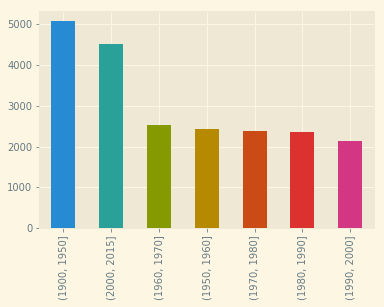

In [195]:
# Post 1950s by decades is the seperation
bins = [1900, 1950, 1960, 1970, 1980, 1990, 2000, 2015]
# splitting the data
bins_yr_built = pd.cut(kc_housing['yr_built'], bins)
# ordering the information
bins_yr_built = bins_yr_built.cat.as_ordered()
# previewing the output
bins_yr_built.value_counts().plot(kind='bar');

Since the target years represent such a small portion of the dataset, I will not alter this column of data, beyond splitting them up in this fashion. But, this provides an avenue for inspection during feature engineering for homes built in these categories.

In [196]:
kc_housing['yr_built'] = bins_yr_built
kc_housing.head()

,lat,long,sqft_lot,sqft_living,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zipcode,yr_built,bedrooms,bathrooms,floors,waterfront,yr_renovated,view,condition,grade,price
id,,,,,,,,,,,,,,,,,,,
7129300520,47.5112,-122.257,5650,1180,1180,0.0,1340,5650,98178,"(1950, 1960]",3,1.00,1.0,0.0,0.0,0.0,3,7,221900.0
6414100192,47.7210,-122.319,7242,2570,2170,1.0,1690,7639,98125,"(1950, 1960]",3,2.25,2.0,0.0,1991.0,0.0,3,7,538000.0
5631500400,47.7379,-122.233,10000,770,770,0.0,2720,8062,98028,"(1900, 1950]",2,1.00,1.0,0.0,0.0,0.0,3,6,180000.0
2487200875,47.5208,-122.393,5000,1960,1050,1.0,1360,5000,98136,"(1960, 1970]",4,3.00,1.0,0.0,0.0,0.0,5,7,604000.0
1954400510,47.6168,-122.045,8080,1680,1680,0.0,1800,7503,98074,"(1980, 1990]",3,2.00,1.0,0.0,0.0,0.0,3,8,510000.0


# Modeling - 2.0

In [197]:
outcome = 'price'
predictors = kc_housing_mod_1.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     198.5
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:25:44   Log-Likelihood:            -2.3884e+05
No. Observations:               18266   AIC:                         4.787e+05
Df Residuals:                   17772   BIC:                         4.825e+05
Df Model:                         493                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.026e+06   6.02e+06     -0.503      0.615   -1.48e+07    8.76e+06
date[T.1/12/2015]   7840.7900   1.19e+05      0.066      0.947   -2.25e+05    2.41e+05
date[T.1/13/2015]   6186.1880   1.19e+05      0.052      0.959   -2.27e+05     2.4e+05
date[T.1/14/2015]   1.581e+04   1.19e+05      0.133      0.894   -2.17e+05    2.48e+05
date[T.1/15/2015]  -4955.5055   1.19e+05     -0.042      0.967   -2.38e+05    2.28e+05
date[T.1/16/2015]  -7270.3015   1.19e+05     -0.061      0.951    -2.4e+05    2.25e+05
date[T.1/17/2015]   7.978e+04   1.66e+05      0.481      0.630   -2.45e+05    4.05e+05
date[T.1/19/2015]   1.145e+04   1.27e+05      0.090      0.928   -2.37e+05     2.6e+05
date[T.1/2/2015]    5.282e+04   1.19e+05      0.445      0.657    -1.8e+05    2.86e+05
date[T.1/20/2015]   3.386e+04   1.19e+05      0.285      0.775   -1.99e+05    2.66e+05
date[T.1/21/2015]   3.909e+04   1.18e+05      0.330      0.741   -1.93e+05    2.71e+05
date[T.1/22/2015]   1601.9542   1.19e+05      0.014      0.989   -2.31e+05    2.34e+05
date[T.1/23/2015]   -1.31e+04   1.19e+05     -0.110      0.912   -2.46e+05     2.2e+05
date[T.1/24/2015]  -1.867e+05   1.36e+05     -1.378      0.168   -4.52e+05    7.89e+04
date[T.1/25/2015]   5.012e+04   1.35e+05      0.370      0.711   -2.15e+05    3.15e+05
date[T.1/26/2015]  -1.741e+04   1.19e+05     -0.147      0.883    -2.5e+05    2.15e+05
date[T.1/27/2015]    2.43e+04   1.18e+05      0.205      0.837   -2.08e+05    2.56e+05
date[T.1/28/2015]    1.83e+04   1.18e+05      0.155      0.877   -2.14e+05     2.5e+05
date[T.1/29/2015]   2.485e+04   1.19e+05      0.209      0.834   -2.08e+05    2.58e+05
date[T.1/30/2015]   7.318e+04   1.19e+05      0.614      0.539    -1.6e+05    3.07e+05
date[T.1/31/2015]  -5871.7027   1.66e+05     -0.035      0.972   -3.31e+05    3.19e+05
date[T.1/5/2015]    1.131e+04   1.18e+05      0.095      0.924   -2.21e+05    2.44e+05
date[T.1/6/2015]    1.095e+04   1.19e+05      0.092      0.927   -2.22e+05    2.44e+05
date[T.1/7/2015]    3.307e+04   1.19e+05      0.279      0.780   -1.99e+05    2.65e+05
date[T.1/8/2015]   -6805.0862   1.19e+05     -0.057      0.954   -2.39e+05    2.26e+05
date[T.1/9/2015]    4.359e+04   1.19e+05      0.365      0.715    -1.9e+05    2.77e+05
date[T.10/1/2014]   2.786e+04   1.18e+05      0.236      0.813   -2.04e+05    2.59e+05
date[T.10/10/2014]  -317.8518   1.18e+05     -0.003      0.998   -2.32e+05    2.31e+05
date[T.10/12/2014]  3.966e+04   1.35e+05      0.293      0.770   -2.26e+05    3.05e+05
date[T.10/13/2014] -3802.6020   1.18e+05     -0.032      0.974   -2.36e+05    2.28e+05
date[T.10/14/2014]   1.55e+04   1.18e+05      0.131      0.895   -2.16e+05    2.47e+05
date[T.10/15/2014]  4298.3017   1.18e+05      0.036      0.971   -2.27e+05    2.36e+05
date[T.10/16/2014]  1.525e+04   1.18e+

The adjusted r-squared vales is 0.842, which is lower than our raw data, but is now more focused on our target group of people with homes closer to the mean number of bedrooms. The following variables are statistically significant (meaning their p-value is less than 0.05):
- yr_built = 1950-1960, 1961-1970, 1971-1980, 1981-1990, 1991-2000, 2001-2015
- bathrooms = 3.75, 4, 4.25, 4.75, 6, 6.75, 7.5
- waterfront = 1
- views = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 11, 12, 13
- sqft_lot
- sqft_living
- sqft_above
- sqft_living15
- bedrooms
- floors
- yr_renovated

Drop sqft_basement, sqft_lot15

## Bedroom Exploration
The larger homes are presenting differently, than smaller homes. Let's explore why.

In [198]:
# how many homes have more than 6 bedrooms?
bed_count = kc_housing.bedrooms.value_counts()
bed_count
print('percentage of homes with more than 6 bedrooms: ' + 
      str(((270 + 38 + 13+ 6 + 10 + 33 + 11) / len(kc_housing.bedrooms)) * 100))

percentage of homes with more than 6 bedrooms: 1.7692950682641404


Let's separate the homes with more than 6 bedrooms from the other types of homes.

In [199]:
# new bedrooms
kc_housing_mod_2 = kc_housing.loc[kc_housing['bedrooms'] <= 6]
print(len(kc_housing))
print(len(kc_housing_mod_2))
kc_housing_mod_2.isna().sum()

21534
21472


lat               0
long              0
sqft_lot          0
sqft_living       0
sqft_above        0
sqft_basement     0
sqft_living15     0
sqft_lot15        0
zipcode           0
yr_built         87
bedrooms          0
bathrooms         0
floors            0
waterfront        0
yr_renovated      0
view              0
condition         0
grade             0
price             0
dtype: int64

Let's go and order those categroical values. We need to order this category when it is created.

In [200]:
test_bedrooms = kc_housing_mod_2['bedrooms'].value_counts()
# test_bedrooms
cat_type = CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33], ordered=True)
# cat_type
kc_housing_mod_2.loc[:, 'bedrooms'] = pd.Series.astype(kc_housing_mod_2['bedrooms'], cat_type)
kc_housing_mod_2.dtypes

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


lat               float64
long              float64
sqft_lot            int64
sqft_living         int64
sqft_above          int64
sqft_basement     float64
sqft_living15       int64
sqft_lot15          int64
zipcode          category
yr_built         category
bedrooms         category
bathrooms        category
floors            float64
waterfront       category
yr_renovated      float64
view             category
condition        category
grade            category
price             float64
dtype: object

In [201]:
print(kc_housing_mod_2.isna().sum())
kc_housing_mod_2['bedrooms'] = pd.CategoricalIndex(data=kc_housing_mod_2['bedrooms']).remove_unused_categories()
print(kc_housing_mod_2['bedrooms'].value_counts())

lat               0
long              0
sqft_lot          0
sqft_living       0
sqft_above        0
sqft_basement     0
sqft_living15     0
sqft_lot15        0
zipcode           0
yr_built         87
bedrooms          0
bathrooms         0
floors            0
waterfront        0
yr_renovated      0
view              0
condition         0
grade             0
price             0
dtype: int64
3    9791
4    6865
2    2754
5    1596
6     270
1     196
Name: bedrooms, dtype: int64


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NameError: name 'kc_housing_mod_3' is not defined

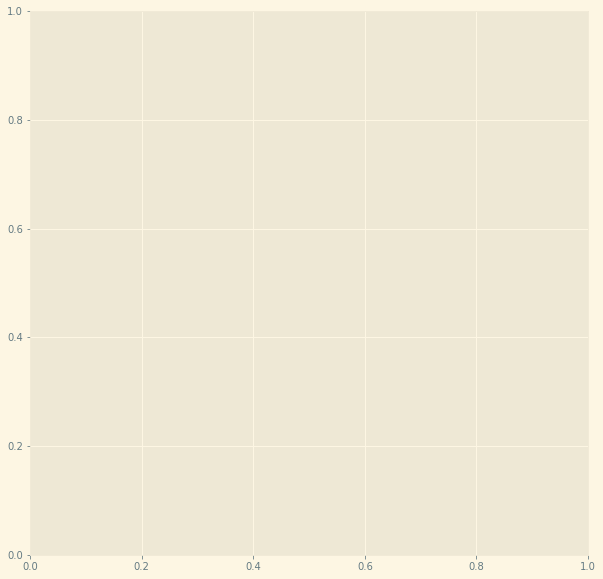

In [202]:
fig27 = plt.figure(figsize=(10,10))
ax1 = fig27.add_subplot(111)
visual5 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1250000]
ax1 = sns.scatterplot(x=visual5['sqft_living15'], 
                      y=visual5['price'], legend='full', hue=visual5['yr_built'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Number of Bedrooms', loc='upper left')
fig27.savefig('Price by Square Footage of the Closest 15 Year Built.png')

### Colinearity Check

In [ ]:
abs(kc_housing_mod_2.corr()) > 0.75

In [ ]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

It looks like sqft_living and sqft_above are similiar. Since we converted the sqft_basement data into a category, and sqft_above was related to this insignifcant value, I'm inclined to drop sqft_above.

In [ ]:
kc_housing_mod_2 = kc_housing_mod_2.drop(labels='sqft_above', axis=1)
kc_housing_mod_2.head()

In [ ]:
abs(kc_housing_mod_2.corr()) > 0.75

In [ ]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

In [ ]:
# next step
# identify which feature to drop, sqft_living or sqft_living15
kc_housing_mod_2.corr()

It looks like sqft_living is more colinear with price, so let's drop sqft_living.

In [ ]:
# Remove sqft_living from data set
kc_housing_mod_2 = kc_housing_mod_2.drop(labels='sqft_living', axis=1)
kc_housing_mod_2.head()

In [ ]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

# Model 3.0

In [ ]:
outcome = 'price'
predictors = kc_housing_mod_2.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_2).fit()
model.summary()

The adjusted r-squared vales is 0.823. While this adjusted r-squared is lower than in previous models, colinearity has been removed. The following variable are statistically significant in the model.

- zipcodes 
 - last time there were 21 zipcodes that were insignifcant, but this time there are only 18, so I think that maybe one of the variables that we adjusted between model 2 and 3 affected the statistical significance of the category zipcode
- yr_built = 1986-2008
- bedrooms = 2, 3, 4, 5, 6
- bathrooms = 3.25, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7.5, 7.75, 8
- waterfront = 1
- yr_renovated = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 11, 12, 13
- sqft_basement
- lat
- long
- sqft_lot
- sqft_living15

In [ ]:
# histograms
# normality assumptions (linear, normal, heterskedacity)
# heat maps
# correleations
# decisions

In [ ]:
outcome = 'price'
predictors = kc_housing_mod_3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_3).fit()
model.summary()

After eliminating outliers, our adjusted r-squared value is 0.821, which is lower than before. Let's see if the variable p-values have gotten better.
- This model increases the statistical significace to all but 6 zipcodes.
- yr_built = 1986-2008, 2008-2015
- bedrooms = 2, 3, 4, 5, 6
- bathrooms = 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 6, 6.25, 6.75, 7.75, 8
- waterfront = 1
- yr_renovated = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 11, 12, 13
- sqft_basement = 1
- long
- sqft_lot
- sqft_living15
This model is much improved over the last model that we had because more of the data is significant. Let's start to train this model by picking out the most important contributors.

## Modeling

In [ ]:
x_cols = ['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
pd.plotting.scatter_matrix(kc_housing_mod_3[x_cols], figsize=(10,12));

None of this data is normalized. We'll have to transform it.

## Visualizations

In [ ]:
fig20 = plt.figure(figsize=(10,10))
ax1 = fig20.add_subplot(111)
sns.set(palette='colorblind')
visual1 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1250000]
ax1 = sns.scatterplot(x=visual1['sqft_living15'], 
                      y=visual1['price'], legend='full', hue=visual1['bedrooms'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Number of Bedrooms', loc='upper left', labels=['1', '2', '3', '4', '5', '6'])
fig20.savefig('Price by Square Footage of the Closest 15 Neighbors1.png')

In [ ]:
fig21 = plt.figure(figsize=(10,10))
ax1 = fig21.add_subplot(111)
visual2 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1500000]
ax1 = sns.scatterplot(x=visual2['sqft_living15'], 
                      y=visual2['price'], legend='full', hue=visual2['condition'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Condition', loc='upper left', labels=['1', '2', '3', '4', '5', '6', '7'])
fig21.savefig('Price by Square Footage of the Closest 15 Neighbors Condition.png')

In [ ]:
fig22 = plt.figure(figsize=(10,10))
ax1 = fig22.add_subplot(111)
visual2 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1500000]
ax1 = sns.scatterplot(x=visual2['sqft_living15'], 
                      y=visual2['price'], legend='full', hue=visual2['view'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Views', loc='upper left', labels=['0', '1', '2', '3', '4'])
fig22.savefig('Price by Square Footage of the Closest 15 Neighbors View.png')

In [ ]:
fig23 = plt.figure(figsize=(10,10))
ax1 = fig23.add_subplot(111)
visual3 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 3000000]
ax1 = sns.scatterplot(x=visual3['sqft_living15'], 
                      y=visual3['price'], legend='full', hue=visual3['grade'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Grade', loc='upper left', labels=['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])
fig23.savefig('Price by Square Footage of the Closest 15 Neighbors Grade.png')

In [ ]:
# # sqft_living15 log transformation
# non_normal = ['sqft_living15']
# for feat in non_normal:
#     kc_housing_mod_3[feat] = kc_housing_mod_3[feat].map(lambda x: np.log(x))
# kc_housing_mod_4 = kc_housing_mod_3
# pd.plotting.scatter_matrix(kc_housing_mod_4[x_cols], figsize=(10,12));

In [ ]:
# # sqft_lot min-max scaling
# min_lot = min(kc_housing_mod_4['sqft_lot'])
# # min_age
# max_lot = max(kc_housing_mod_4['sqft_lot'])
# # max_age
# transform = []
# for m, j in enumerate(kc_housing_mod_4['sqft_lot']):
#     transform.append((m - min_lot) / (max_lot - min_lot))
# lot_min_max = pd.DataFrame(transform)
# lot_min_max.index = list(kc_housing_mod_4.index)
# lot_min_max.columns = ['sqft_lot_t']
# kc_housing_mod_4 = kc_housing_mod_4.drop(labels='sqft_lot', axis=1)
# new_df = [kc_housing_mod_4, lot_min_max]
# kc_housing_transform = pd.concat(new_df, axis=1)
# x_cols = ['lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot_t']
# pd.plotting.scatter_matrix(kc_housing_transform[x_cols], figsize=(10,12));
# # the output on this is awful, going to leave it the same

## Time for regression diagnositics!

In [ ]:
# general data sense
kc_housing_mod_3.describe()

In [ ]:
# normality check
fig10 = plt.figure(figsize=(20,10))
ax1 = fig10.add_subplot(161)
sns.distplot(kc_housing_mod_3['lat'])
ax2 = fig10.add_subplot(162)
sns.distplot(kc_housing_mod_3['long'])
ax3 = fig10.add_subplot(163)
sns.distplot(kc_housing_mod_3['sqft_lot'])
ax4 = fig10.add_subplot(164)
sns.distplot(kc_housing_mod_3['sqft_living15'])
ax5 = fig10.add_subplot(165)
sns.distplot(kc_housing_mod_3['sqft_lot15'])
ax6 = fig10.add_subplot(166)
sns.distplot(kc_housing_mod_3['price']);

To note here, lat and long will only be used together. The real predictors that we're evaulating are sqft_lot, sqft_living15, and sqft_lot15 (which wasn't statistically significant in the last model). So, sqft_living15 is normal, both sqft_lot and sqft_lot15 are close with some abnormality on the left side of the graph.

In [ ]:
# check for linearity
fig11 = plt.figure(figsize=(20,32))
ax1 = fig11.add_subplot(511)
ax1 = sns.scatterplot(kc_housing_mod_3['lat'],kc_housing_mod_3['price'])
ax2 = fig11.add_subplot(512)
ax2 = sns.scatterplot(kc_housing_mod_3['long'],kc_housing_mod_3['price'])
ax3 = fig11.add_subplot(513)
ax3 = sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
ax4 = fig11.add_subplot(514)
ax4 = sns.scatterplot(kc_housing_mod_3['sqft_living15'],kc_housing_mod_3['price'])
ax5 = fig11.add_subplot(515)
ax5 = sns.scatterplot(kc_housing_mod_3['sqft_lot15'],kc_housing_mod_3['price']);

In [ ]:
# model
outcome = 'price'
predictors = kc_housing_mod_3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_3).fit()
model.summary()

The best linear model is sqft_living15. Lat and long also show weak linearity. Sqft_lot and sqft_lot15 show even weaker linearity, but it is there.

In [ ]:
# create a DataFrame with the minimum and maximum values of sqft_living15
sqft_living15_min_max = [kc_housing_mod_3['sqft_living15'].min(), kc_housing_mod_3['sqft_living15'].max()]
# make predictions for those x values and store them
def predicted_y (xs): #predicted y values based on x values
    import numpy as np
    m = 129800
    c = 643400
    y_predicted = []
    for x in xs:
        y_predicted.append(m*x + c)
    return y_predicted
predicted_y = predicted_y(sqft_living15_min_max)
# first, plot the observed data and the least squares line
sns.scatterplot(kc_housing_mod_3['sqft_living15'],kc_housing_mod_3['price'])
sns.lineplot(sqft_living15_min_max,predicted_y)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

Well, sqft_living15 is heterskedastic, and unreliable. Let's check sqft_lot.

In [ ]:
# create a DataFrame with the minimum and maximum values of sqft_lot
sqft_lot_min_max = [kc_housing_mod_3['sqft_lot'].min(), kc_housing_mod_3['sqft_lot'].max()]
# make predictions for those x values and store them
def predicted_y (xs): #predicted y values based on x values
    import numpy as np
    m = 7.2305
    c = 643400
    y_predicted = []
    for x in xs:
        y_predicted.append(m*x + c)
    return y_predicted
predicted_y = predicted_y(sqft_lot_min_max)
# first, plot the observed data and the least squares line
sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
sns.lineplot(sqft_lot_min_max,predicted_y)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
# decided to powertransform with yeo-johnson instead

sqft_lot isn't heterskedastic, but also isn't normal. Let's look at a transformation for both, specifically a powertransformation.

In [ ]:
# power transform
sqft_living15_data = kc_housing_mod_3['sqft_living15']
# kc_housing_mod_3['sqft_living15'] = stats.yeojohnson(sqft_living15_data, lmbda=-0.5551641516869747)
# # this particular power transfromation from stats models can only be performed on float data,
# # so conversion of sqft_lot to float64
# kc_housing_mod_3['sqft_lot'] = kc_housing_mod_3['sqft_lot'].astype(dtype='float64')
sqft_lot_data = kc_housing_mod_3['sqft_lot']
# kc_housing_mod_3['sqft_lot'] = stats.yeojohnson(sqft_lot_data, lmbda=0.7043134629464194)
# pd.plotting.scatter_matrix(kc_housing_mod_3[x_cols], figsize=(10,12));
sqft_living15_data_trans = sqft_living15_data**-0.5551641516869747
kc_housing_mod_3['sqft_living15'] = sqft_living15_data_trans
sqft_lot_data_trans = sqft_lot_data**0.7043134629464194
kc_housing_mod_3['sqft_lot'] = sqft_lot_data_trans
# model
outcome = 'price'
predictors = kc_housing_mod_3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_3).fit()
model.summary()

In [ ]:
kc_housing_mod_3['sqft_lot']

In [ ]:
# create a DataFrame with the minimum and maximum values of sqft_lot
sqft_lot_min_max = [kc_housing_mod_3['sqft_lot'].min(), kc_housing_mod_3['sqft_lot'].max()]
# make predictions for those x values and store them
def predicted_y (xs): #predicted y values based on x values
    import numpy as np
    m = 7.2305
    c = 643400
    y_predicted = []
    for x in xs:
        y_predicted.append(m*x + c)
    return y_predicted
predicted_y = predicted_y(sqft_lot_min_max)
# first, plot the observed data and the least squares line
sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
sns.lineplot(sqft_lot_min_max,predicted_y)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [ ]:
# log transformation of price
non_normal = ['price']
for feat in non_normal:
    kc_housing_mod_3[feat] = kc_housing_mod_3[feat].map(lambda x: np.log(x))

In [ ]:
# model
outcome = 'price'
predictors = kc_housing_mod_3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_3).fit()
model.summary()

In [ ]:
sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
sns.lineplot(sqft_lot_min_max,predicted_y)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

None of these models really fit the normal, linear, and heterskedastic criteria. So, let's develop some features.

## Features

In [ ]:
# lot divided by living15
lot_per_living15 = []
i = 0
for i in kc_housing_mod_3['sqft_lot']:
    for j in kc_housing_mod_3['sqft_living15']:
        dividend = i / j
    lot_per_living15.append(dividend)
lot_per_living15 = pd.DataFrame(data=lot_per_living15)
lot_per_living15.index = list(kc_housing_mod_3.index)
lot_per_living15.columns = ['lot_per_living15']
kc_housing_mod_5 = pd.concat([kc_housing_mod_3, lot_per_living15], axis=1)
kc_housing_mod_5.head()

In [ ]:
# model
outcome = 'price'
predictors = kc_housing_mod_5.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_5).fit()
model.summary()

In [ ]:
# # bedrooms per sqft_lot
bedrooms_per_sqft_lot = []
i = 0
for i in kc_housing_mod_5['bedrooms']:
    for j in kc_housing_mod_5['sqft_lot']:
        dividend = j / i
    bedrooms_per_sqft_lot.append(dividend)
bedrooms_per_sqft_lot = pd.DataFrame(data=bedrooms_per_sqft_lot)
bedrooms_per_sqft_lot.index = list(kc_housing_mod_5.index)
bedrooms_per_sqft_lot.columns = ['bedrooms_per_sqft_lot']
kc_housing_mod_6 = pd.concat([kc_housing_mod_5, bedrooms_per_sqft_lot], axis=1)
kc_housing_mod_6.head()

In [ ]:
# model
outcome = 'price'
predictors = kc_housing_mod_6.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_6).fit()
model.summary()

In [ ]:
# bathrooms per bedroom
bathrooms_per_bedroom = []
i = 0
for i in kc_housing_mod_6['bathrooms']:
    for j in kc_housing_mod_6['bedrooms']:
        dividend = i / j
    bathrooms_per_bedroom.append(dividend)
bathrooms_per_bedroom = pd.DataFrame(data=bathrooms_per_bedroom)
bathrooms_per_bedroom.index = list(kc_housing_mod_5.index)
bathrooms_per_bedroom.columns = ['bathrooms_per_bedroom']
kc_housing_mod_7 = pd.concat([kc_housing_mod_6, bathrooms_per_bedroom], axis=1)
kc_housing_mod_7.head()

In [ ]:
# model
outcome = 'price'
predictors = kc_housing_mod_7.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_7).fit()
model.summary()

In [ ]:
fig25 = plt.figure(figsize=(10,10))
ax1 = fig25.add_subplot(111)
visual4 = kc_housing_mod_7.loc[kc_housing_mod_7['price'] < 3000000]
ax1 = sns.scatterplot(x=visual3['sqft_living15'], 
                      y=visual3['price'], legend='full', hue=visual4['bathrooms_per_bedroom'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Bathrooms Per Bedroom', loc='upper left')
fig25.savefig('Price by Square Footage of the Closest 15 Neighbors Bathrooms per Bedroom.png')

In [ ]:
# which variables are the best predictors
# from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

kc_housing_mod_7_adj = kc_housing_mod_7.drop(labels='yr_built', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='zipcode', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='bedrooms', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='bathrooms', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='waterfront', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='yr_renovated', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='view', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='condition', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='grade', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='sqft_basement', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='price', axis=1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)
# lat, long, sqft_living15, bedrooms_per_sqft_lot, bathrooms_per_bedroom

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 1)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

## Interpret Model

What does any of this mean?
The biggest indicator of price is how big your neighbor's houses are. The second is where your latitude is located. The third biggest indicator of price is your longitude. These are not factors that can easily be changed by a home seller; however, there is hope. The number of bathrooms per bedroom is able to influence price, and this is a change that a home seller could make to increase the value of the home. This model runs with an adjusted r-squared value of 0.825. 

## Evaluation of Model

In [ ]:
# use test data set here
y = kc_housing_mod_7['price']
X = kc_housing_mod_7_adj
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
percentage = mse_train / mse_test
percentage

This train test split shows that the model is effective. The error is similar, within about 5% of each other.

## Cross Validation of Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
print(cv_5_results)
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
print(cv_10_results)
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))
print(cv_20_results)

# Implementation of Model

In [ ]:
# def current_sell_price():
#     x = int(xbath) / int(xbed)
#     m = 201900
#     y_current = (m * x)
#     return (y_current)
# xbath = input('How many bathrooms do you currently have? ')
# xbed = input('How many bedrooms do you currently have? ')

In [ ]:
# current_sell_price()

In [ ]:
# def projected_sell_price():
#     x_proj = int(xbath1) / int(xbed1)
#     m = 201900
#     y_projected = (m * x_proj)
#     return(y_projected)
# xbath1 = input('How many bathrooms would you like to have? ')
# xbed1 = input('How many bedrooms would you like to have? ')

In [ ]:
# projected_sell_price()

In [ ]:
# difference = projected_sell_price() - current_sell_price()
# difference

From this model, if you increase a 2 bath, 2 bed home to a 3 bath, 2 bed home, that will increase the selling value of the home by $100,950. So plan to renovate for less than that!

## Future Work

Work with location data to determine sell information.